# USD MSADS 502 Final Project - Team 3
# Caleb McCurdy, Trevor Sauerbrey, and UE Wang

# Part 1 Data preparation

In [1]:
# import the needed packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split 

In [2]:
import warnings
warnings.filterwarnings('ignore')
warnings.warn('DelftStack')
warnings.warn('Do not show this message')
print("No Warning Shown")

No Warning Shown


In [3]:
flight = pd.read_csv('Combined_Flights_2018.csv')

In [4]:
flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5689512 entries, 0 to 5689511
Data columns (total 61 columns):
 #   Column                                   Dtype  
---  ------                                   -----  
 0   FlightDate                               object 
 1   Airline                                  object 
 2   Origin                                   object 
 3   Dest                                     object 
 4   Cancelled                                bool   
 5   Diverted                                 bool   
 6   CRSDepTime                               int64  
 7   DepTime                                  float64
 8   DepDelayMinutes                          float64
 9   DepDelay                                 float64
 10  ArrTime                                  float64
 11  ArrDelayMinutes                          float64
 12  AirTime                                  float64
 13  CRSElapsedTime                           float64
 14  ActualElapsedTime 

In [5]:
flight['Cancelled'].value_counts()

False    5601139
True       88373
Name: Cancelled, dtype: int64

In [6]:
# drop the unneeded columns
flight = flight.drop(["Marketing_Airline_Network", "DOT_ID_Marketing_Airline", "IATA_Code_Marketing_Airline", 
           "OriginAirportSeqID", "OriginCityMarketID", "OriginStateFips", "DestAirportSeqID", 
           "DestCityMarketID", "DestStateFips", "Operated_or_Branded_Code_Share_Partners",
            "DOT_ID_Operating_Airline", "Flight_Number_Marketing_Airline", "IATA_Code_Operating_Airline",
            "Year", "Tail_Number", "OriginAirportID", "OriginAirportID", "DestAirportID",
            "DivAirportLandings","Operating_Airline","OriginState", "OriginWac","DestState",
            "DestWac","DepDelayMinutes", "ArrDelayMinutes","DestCityName","OriginCityName",
            "CRSDepTime", "Flight_Number_Operating_Airline","CRSArrTime", "Diverted",
            "ArrDel15", "DepDel15", "ArrivalDelayGroups", "DepartureDelayGroups", "DistanceGroup",
            "TaxiOut","TaxiIn", "WheelsOff", "WheelsOn" ,"OriginStateName", "DestStateName",], axis = 1)
flight.head()

,FlightDate,Airline,Origin,Dest,Cancelled,DepTime,DepDelay,ArrTime,AirTime,CRSElapsedTime,ActualElapsedTime,Distance,Quarter,Month,DayofMonth,DayOfWeek,DepTimeBlk,ArrDelay,ArrTimeBlk
0,2018-01-23,Endeavor Air Inc.,ABY,ATL,False,1157.0,-5.0,1256.0,38.0,62.0,59.0,145.0,1,1,23,2,1200-1259,-8.0,1300-1359
1,2018-01-24,Endeavor Air Inc.,ABY,ATL,False,1157.0,-5.0,1258.0,36.0,62.0,61.0,145.0,1,1,24,3,1200-1259,-6.0,1300-1359
2,2018-01-25,Endeavor Air Inc.,ABY,ATL,False,1153.0,-9.0,1302.0,40.0,62.0,69.0,145.0,1,1,25,4,1200-1259,-2.0,1300-1359
3,2018-01-26,Endeavor Air Inc.,ABY,ATL,False,1150.0,-12.0,1253.0,35.0,62.0,63.0,145.0,1,1,26,5,1200-1259,-11.0,1300-1359
4,2018-01-27,Endeavor Air Inc.,ABY,ATL,False,1355.0,-5.0,1459.0,36.0,60.0,64.0,145.0,1,1,27,6,1400-1459,-1.0,1500-1559


In [7]:
flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5689512 entries, 0 to 5689511
Data columns (total 19 columns):
 #   Column             Dtype  
---  ------             -----  
 0   FlightDate         object 
 1   Airline            object 
 2   Origin             object 
 3   Dest               object 
 4   Cancelled          bool   
 5   DepTime            float64
 6   DepDelay           float64
 7   ArrTime            float64
 8   AirTime            float64
 9   CRSElapsedTime     float64
 10  ActualElapsedTime  float64
 11  Distance           float64
 12  Quarter            int64  
 13  Month              int64  
 14  DayofMonth         int64  
 15  DayOfWeek          int64  
 16  DepTimeBlk         object 
 17  ArrDelay           float64
 18  ArrTimeBlk         object 
dtypes: bool(1), float64(8), int64(4), object(6)
memory usage: 786.8+ MB


#### If a flight has been cancelled, it doesn't have departure and arrival data. 
#### We will drop the data that contain missing values for delay analysis.
## Add the needed column

In [8]:
# 1. Flight_Status column

def Flight_Status(value):
    if value <= 0.0:
        return "Early Depart_On Time"
    if 0.0 < value <= 15.0:
        return "DepDelay < 15 min"
    elif 15.0 < value <= 30.0:
        return "DepDelay 16-30 min"
    elif 30.0 < value <= 60.0:
        return "DepDelay 31-60 min"
    elif value > 60.0:
        return "DepDelay > 61"
    else:
        return "Cancelled"

flight['Flight_Status'] = flight['DepDelay'].map(Flight_Status)
display(flight.head())

,FlightDate,Airline,Origin,Dest,Cancelled,DepTime,DepDelay,ArrTime,AirTime,CRSElapsedTime,ActualElapsedTime,Distance,Quarter,Month,DayofMonth,DayOfWeek,DepTimeBlk,ArrDelay,ArrTimeBlk,Flight_Status
0,2018-01-23,Endeavor Air Inc.,ABY,ATL,False,1157.0,-5.0,1256.0,38.0,62.0,59.0,145.0,1,1,23,2,1200-1259,-8.0,1300-1359,Early Depart_On Time
1,2018-01-24,Endeavor Air Inc.,ABY,ATL,False,1157.0,-5.0,1258.0,36.0,62.0,61.0,145.0,1,1,24,3,1200-1259,-6.0,1300-1359,Early Depart_On Time
2,2018-01-25,Endeavor Air Inc.,ABY,ATL,False,1153.0,-9.0,1302.0,40.0,62.0,69.0,145.0,1,1,25,4,1200-1259,-2.0,1300-1359,Early Depart_On Time
3,2018-01-26,Endeavor Air Inc.,ABY,ATL,False,1150.0,-12.0,1253.0,35.0,62.0,63.0,145.0,1,1,26,5,1200-1259,-11.0,1300-1359,Early Depart_On Time
4,2018-01-27,Endeavor Air Inc.,ABY,ATL,False,1355.0,-5.0,1459.0,36.0,60.0,64.0,145.0,1,1,27,6,1400-1459,-1.0,1500-1559,Early Depart_On Time


In [9]:
# 2. Distance_level column:

def Distance_level(value):
    if value <= 300.0:
        return "Distance < 300"
    if 300.0 < value <= 600.0:
        return "Distance 300-600 mile"
    elif 600.0 < value <= 900.0:
        return "Distance 600-900 mile"
    elif 900.0 < value <= 1200.0:
        return "Distance 900-1200 mile"
    elif 1200.0 < value <= 1500.0:
        return "Distance 1200-1500 mile"
    elif 1500.0 < value <= 1800.0:
        return "Distance 1500-1800 mile"
    elif 1800.0 < value <= 2100.0:
        return "Distance 1800-2100 mile"
    elif 2100.0 < value <= 2400.0:
        return "Distance 2100-2400 mile"
    elif 2400.0 < value <= 2700.0:
        return "Distance 2400-2700 mile"
    elif value > 2700.0:
        return "Distance > 2700 mile"

flight['Distance_level'] = flight['Distance'].map(Distance_level)
display(flight.head())

,FlightDate,Airline,Origin,Dest,Cancelled,DepTime,DepDelay,ArrTime,AirTime,CRSElapsedTime,...,Distance,Quarter,Month,DayofMonth,DayOfWeek,DepTimeBlk,ArrDelay,ArrTimeBlk,Flight_Status,Distance_level
0,2018-01-23,Endeavor Air Inc.,ABY,ATL,False,1157.0,-5.0,1256.0,38.0,62.0,...,145.0,1,1,23,2,1200-1259,-8.0,1300-1359,Early Depart_On Time,Distance < 300
1,2018-01-24,Endeavor Air Inc.,ABY,ATL,False,1157.0,-5.0,1258.0,36.0,62.0,...,145.0,1,1,24,3,1200-1259,-6.0,1300-1359,Early Depart_On Time,Distance < 300
2,2018-01-25,Endeavor Air Inc.,ABY,ATL,False,1153.0,-9.0,1302.0,40.0,62.0,...,145.0,1,1,25,4,1200-1259,-2.0,1300-1359,Early Depart_On Time,Distance < 300
3,2018-01-26,Endeavor Air Inc.,ABY,ATL,False,1150.0,-12.0,1253.0,35.0,62.0,...,145.0,1,1,26,5,1200-1259,-11.0,1300-1359,Early Depart_On Time,Distance < 300
4,2018-01-27,Endeavor Air Inc.,ABY,ATL,False,1355.0,-5.0,1459.0,36.0,60.0,...,145.0,1,1,27,6,1400-1459,-1.0,1500-1559,Early Depart_On Time,Distance < 300


In [10]:
flight['Distance_level'].value_counts()

Distance 300-600 mile      1622311
Distance 600-900 mile      1122617
Distance < 300             1090721
Distance 900-1200 mile      851085
Distance 1200-1500 mile     321456
Distance 1500-1800 mile     263937
Distance 2400-2700 mile     163152
Distance 2100-2400 mile     117322
Distance 1800-2100 mile     108952
Distance > 2700 mile         27959
Name: Distance_level, dtype: int64

In [11]:
# 3. Airport_Size column:

flight['Airport_DailyDep_Avg'] = round((flight.groupby('Origin')['Origin'].transform('count')/365),2)
def Airport_Size(value):
    if value <= 50.0:
        return "Small"
    if 50.0 < value <= 500.0:
        return "Medium"
    elif value > 500.0:
        return "Large"

flight['Airport_Size'] = flight['Airport_DailyDep_Avg'].map(Airport_Size)
display(flight.head())

,FlightDate,Airline,Origin,Dest,Cancelled,DepTime,DepDelay,ArrTime,AirTime,CRSElapsedTime,...,Month,DayofMonth,DayOfWeek,DepTimeBlk,ArrDelay,ArrTimeBlk,Flight_Status,Distance_level,Airport_DailyDep_Avg,Airport_Size
0,2018-01-23,Endeavor Air Inc.,ABY,ATL,False,1157.0,-5.0,1256.0,38.0,62.0,...,1,23,2,1200-1259,-8.0,1300-1359,Early Depart_On Time,Distance < 300,1.37,Small
1,2018-01-24,Endeavor Air Inc.,ABY,ATL,False,1157.0,-5.0,1258.0,36.0,62.0,...,1,24,3,1200-1259,-6.0,1300-1359,Early Depart_On Time,Distance < 300,1.37,Small
2,2018-01-25,Endeavor Air Inc.,ABY,ATL,False,1153.0,-9.0,1302.0,40.0,62.0,...,1,25,4,1200-1259,-2.0,1300-1359,Early Depart_On Time,Distance < 300,1.37,Small
3,2018-01-26,Endeavor Air Inc.,ABY,ATL,False,1150.0,-12.0,1253.0,35.0,62.0,...,1,26,5,1200-1259,-11.0,1300-1359,Early Depart_On Time,Distance < 300,1.37,Small
4,2018-01-27,Endeavor Air Inc.,ABY,ATL,False,1355.0,-5.0,1459.0,36.0,60.0,...,1,27,6,1400-1459,-1.0,1500-1559,Early Depart_On Time,Distance < 300,1.37,Small


In [12]:
flight['Airport_DailyDep_Avg'].value_counts()

793.02    289451
690.13    251899
613.18    223810
502.88    183553
446.91    163121
           ...  
0.21          78
0.19          71
0.16          58
0.14          52
0.01           2
Name: Airport_DailyDep_Avg, Length: 326, dtype: int64

In [13]:
# Split the data into 2 datasets, one for the cancelled flights data, the other one for delayed flights

flight_can = flight[flight['Cancelled'] != False]
flight_delay = flight[flight['Cancelled'] == False]
flight_delay = flight_delay.dropna(axis=0)
flight_delay

,FlightDate,Airline,Origin,Dest,Cancelled,DepTime,DepDelay,ArrTime,AirTime,CRSElapsedTime,...,Month,DayofMonth,DayOfWeek,DepTimeBlk,ArrDelay,ArrTimeBlk,Flight_Status,Distance_level,Airport_DailyDep_Avg,Airport_Size
0,2018-01-23,Endeavor Air Inc.,ABY,ATL,False,1157.0,-5.0,1256.0,38.0,62.0,...,1,23,2,1200-1259,-8.0,1300-1359,Early Depart_On Time,Distance < 300,1.37,Small
1,2018-01-24,Endeavor Air Inc.,ABY,ATL,False,1157.0,-5.0,1258.0,36.0,62.0,...,1,24,3,1200-1259,-6.0,1300-1359,Early Depart_On Time,Distance < 300,1.37,Small
2,2018-01-25,Endeavor Air Inc.,ABY,ATL,False,1153.0,-9.0,1302.0,40.0,62.0,...,1,25,4,1200-1259,-2.0,1300-1359,Early Depart_On Time,Distance < 300,1.37,Small
3,2018-01-26,Endeavor Air Inc.,ABY,ATL,False,1150.0,-12.0,1253.0,35.0,62.0,...,1,26,5,1200-1259,-11.0,1300-1359,Early Depart_On Time,Distance < 300,1.37,Small
4,2018-01-27,Endeavor Air Inc.,ABY,ATL,False,1355.0,-5.0,1459.0,36.0,60.0,...,1,27,6,1400-1459,-1.0,1500-1559,Early Depart_On Time,Distance < 300,1.37,Small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5689507,2018-09-11,Air Wisconsin Airlines Corp,SCE,IAD,False,1433.0,-12.0,1515.0,35.0,61.0,...,9,11,2,1400-1459,-31.0,1500-1559,Early Depart_On Time,Distance < 300,7.87,Small
5689508,2018-09-11,Air Wisconsin Airlines Corp,IAD,GSO,False,1224.0,-11.0,1344.0,43.0,80.0,...,9,11,2,1200-1259,-11.0,1300-1359,Early Depart_On Time,Distance < 300,235.35,Medium
5689509,2018-09-11,Air Wisconsin Airlines Corp,EVV,ORD,False,1016.0,-14.0,1137.0,54.0,94.0,...,9,11,2,1000-1059,-27.0,1200-1259,Early Depart_On Time,Distance < 300,8.69,Small
5689510,2018-09-11,Air Wisconsin Airlines Corp,ORD,HPN,False,1403.0,-7.0,1717.0,104.0,136.0,...,9,11,2,1400-1459,-9.0,1700-1759,Early Depart_On Time,Distance 600-900 mile,793.02,Large


In [14]:
# 4. delay_level column:

# Calculate the delay difference using the arrival delay minus departure delay within the delay dataset
flight_delay['Delay_diff'] = flight_delay['ArrDelay'] - flight_delay['DepDelay']
def delay_level(value):
    if value <= 0:
        return "Diff < 0"
    if 0.0 < value <= 15.0:
        return "Diff < 15 min"
    elif 15.0 < value <= 30.0:
        return "Diff 16-30 min"
    elif 30.0 < value <= 60.0:
        return "Diff 31-60 min"
    elif value > 60.0:
        return "Diff > 61"

flight_delay['delay_level'] = flight_delay['Delay_diff'].map(delay_level)
display(flight_delay.head())

,FlightDate,Airline,Origin,Dest,Cancelled,DepTime,DepDelay,ArrTime,AirTime,CRSElapsedTime,...,DayOfWeek,DepTimeBlk,ArrDelay,ArrTimeBlk,Flight_Status,Distance_level,Airport_DailyDep_Avg,Airport_Size,Delay_diff,delay_level
0,2018-01-23,Endeavor Air Inc.,ABY,ATL,False,1157.0,-5.0,1256.0,38.0,62.0,...,2,1200-1259,-8.0,1300-1359,Early Depart_On Time,Distance < 300,1.37,Small,-3.0,Diff < 0
1,2018-01-24,Endeavor Air Inc.,ABY,ATL,False,1157.0,-5.0,1258.0,36.0,62.0,...,3,1200-1259,-6.0,1300-1359,Early Depart_On Time,Distance < 300,1.37,Small,-1.0,Diff < 0
2,2018-01-25,Endeavor Air Inc.,ABY,ATL,False,1153.0,-9.0,1302.0,40.0,62.0,...,4,1200-1259,-2.0,1300-1359,Early Depart_On Time,Distance < 300,1.37,Small,7.0,Diff < 15 min
3,2018-01-26,Endeavor Air Inc.,ABY,ATL,False,1150.0,-12.0,1253.0,35.0,62.0,...,5,1200-1259,-11.0,1300-1359,Early Depart_On Time,Distance < 300,1.37,Small,1.0,Diff < 15 min
4,2018-01-27,Endeavor Air Inc.,ABY,ATL,False,1355.0,-5.0,1459.0,36.0,60.0,...,6,1400-1459,-1.0,1500-1559,Early Depart_On Time,Distance < 300,1.37,Small,4.0,Diff < 15 min


In [15]:
# 5. DepDelay_level column:

def DepDelay_level(value):
    if value <= 0.0:
        return "Early Depart < 0"
    if 0.0 < value <= 15.0:
        return "DepDelay < 15 min"
    elif 15.0 < value <= 30.0:
        return "DepDelay 16-30 min"
    elif 30.0 < value <= 60.0:
        return "DepDelay 31-60 min"
    elif value > 60.0:
        return "DepDelay > 61"

flight_delay['DepDelay_level'] = flight_delay['DepDelay'].map(DepDelay_level)
display(flight_delay.head())

,FlightDate,Airline,Origin,Dest,Cancelled,DepTime,DepDelay,ArrTime,AirTime,CRSElapsedTime,...,DepTimeBlk,ArrDelay,ArrTimeBlk,Flight_Status,Distance_level,Airport_DailyDep_Avg,Airport_Size,Delay_diff,delay_level,DepDelay_level
0,2018-01-23,Endeavor Air Inc.,ABY,ATL,False,1157.0,-5.0,1256.0,38.0,62.0,...,1200-1259,-8.0,1300-1359,Early Depart_On Time,Distance < 300,1.37,Small,-3.0,Diff < 0,Early Depart < 0
1,2018-01-24,Endeavor Air Inc.,ABY,ATL,False,1157.0,-5.0,1258.0,36.0,62.0,...,1200-1259,-6.0,1300-1359,Early Depart_On Time,Distance < 300,1.37,Small,-1.0,Diff < 0,Early Depart < 0
2,2018-01-25,Endeavor Air Inc.,ABY,ATL,False,1153.0,-9.0,1302.0,40.0,62.0,...,1200-1259,-2.0,1300-1359,Early Depart_On Time,Distance < 300,1.37,Small,7.0,Diff < 15 min,Early Depart < 0
3,2018-01-26,Endeavor Air Inc.,ABY,ATL,False,1150.0,-12.0,1253.0,35.0,62.0,...,1200-1259,-11.0,1300-1359,Early Depart_On Time,Distance < 300,1.37,Small,1.0,Diff < 15 min,Early Depart < 0
4,2018-01-27,Endeavor Air Inc.,ABY,ATL,False,1355.0,-5.0,1459.0,36.0,60.0,...,1400-1459,-1.0,1500-1559,Early Depart_On Time,Distance < 300,1.37,Small,4.0,Diff < 15 min,Early Depart < 0


In [16]:
# 6. ArrDelay_level column:

def ArrDelay_level(value):
    if value <= 0.0:
        return "Early Arrival < 0"
    if 0.0 < value <= 15.0:
        return "ArrDelay < 15 min"
    elif 15.0 < value <= 30.0:
        return "ArrDelay 16-30 min"
    elif 30.0 < value <= 60.0:
        return "ArrDelay 31-60 min"
    elif value > 60.0:
        return "ArrDelay > 61"

flight_delay['ArrDelay_level'] = flight_delay['ArrDelay'].map(ArrDelay_level)
display(flight_delay.head())

,FlightDate,Airline,Origin,Dest,Cancelled,DepTime,DepDelay,ArrTime,AirTime,CRSElapsedTime,...,ArrDelay,ArrTimeBlk,Flight_Status,Distance_level,Airport_DailyDep_Avg,Airport_Size,Delay_diff,delay_level,DepDelay_level,ArrDelay_level
0,2018-01-23,Endeavor Air Inc.,ABY,ATL,False,1157.0,-5.0,1256.0,38.0,62.0,...,-8.0,1300-1359,Early Depart_On Time,Distance < 300,1.37,Small,-3.0,Diff < 0,Early Depart < 0,Early Arrival < 0
1,2018-01-24,Endeavor Air Inc.,ABY,ATL,False,1157.0,-5.0,1258.0,36.0,62.0,...,-6.0,1300-1359,Early Depart_On Time,Distance < 300,1.37,Small,-1.0,Diff < 0,Early Depart < 0,Early Arrival < 0
2,2018-01-25,Endeavor Air Inc.,ABY,ATL,False,1153.0,-9.0,1302.0,40.0,62.0,...,-2.0,1300-1359,Early Depart_On Time,Distance < 300,1.37,Small,7.0,Diff < 15 min,Early Depart < 0,Early Arrival < 0
3,2018-01-26,Endeavor Air Inc.,ABY,ATL,False,1150.0,-12.0,1253.0,35.0,62.0,...,-11.0,1300-1359,Early Depart_On Time,Distance < 300,1.37,Small,1.0,Diff < 15 min,Early Depart < 0,Early Arrival < 0
4,2018-01-27,Endeavor Air Inc.,ABY,ATL,False,1355.0,-5.0,1459.0,36.0,60.0,...,-1.0,1500-1559,Early Depart_On Time,Distance < 300,1.37,Small,4.0,Diff < 15 min,Early Depart < 0,Early Arrival < 0


# Part 2: Data Exploration

#### 1. DepDelay & Time Block

In [17]:
# Create 2 dataframe for departure delay only, and for arrival delay only
FB_Dep = flight_delay[(flight_delay['DepDelay'] > 0)]
FB_Arr = flight_delay[(flight_delay['ArrDelay'] > 0)]

Text(0.5, 1.0, 'The Average Departure Delay Time by Time Block')

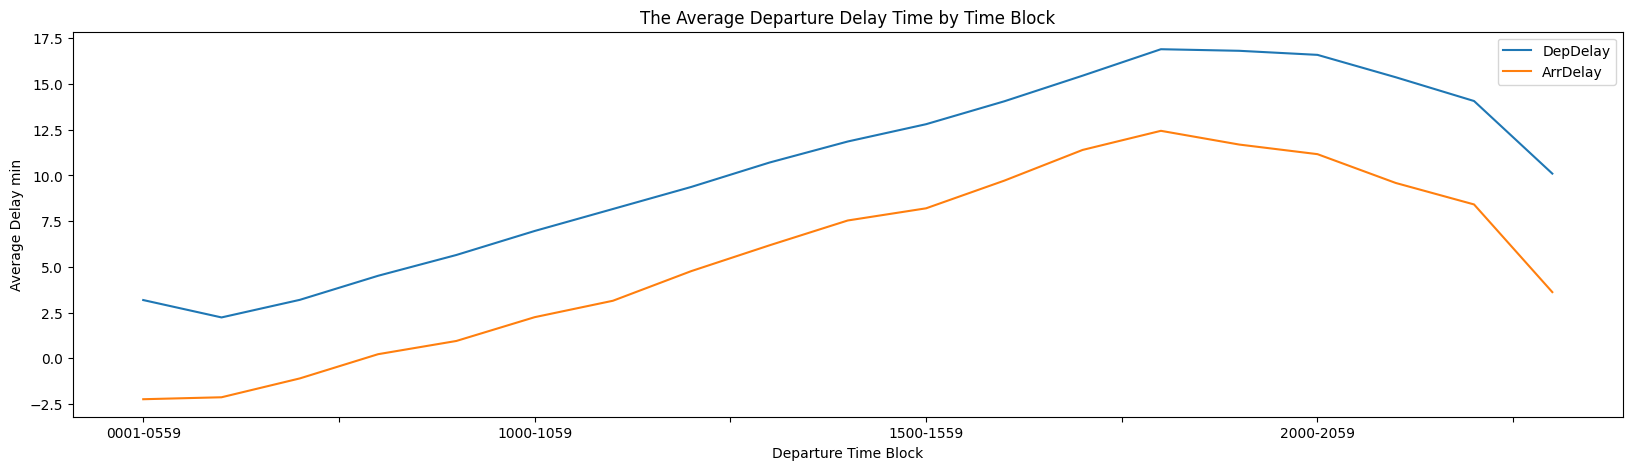

In [18]:
# For all the flights:
plt.figure(figsize=(20,5))
flight_delay.groupby(['DepTimeBlk'])['DepDelay'].mean().plot(legend = True)
flight_delay.groupby(['DepTimeBlk'])['ArrDelay'].mean().plot(legend = True)
plt.xlabel("Departure Time Block")
plt.ylabel("Average Delay min")
plt.title("The Average Departure Delay Time by Time Block")

Text(0.5, 1.0, 'The Average Departure Delay Time by Time Block for DepDelay flights')

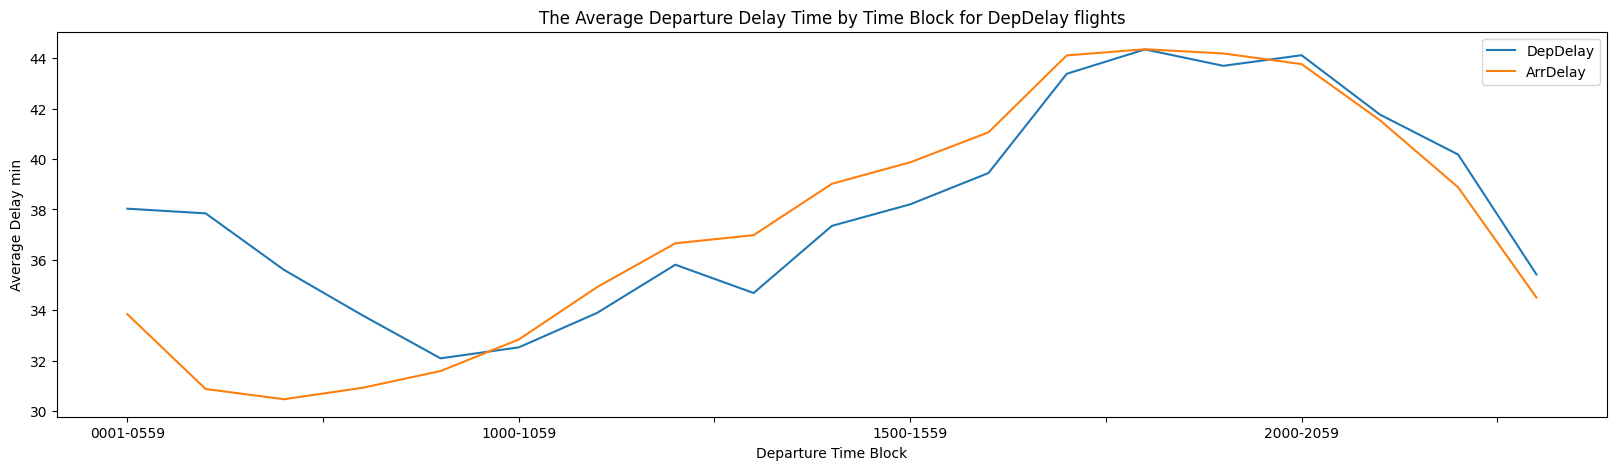

In [19]:
# For delay flights:
plt.figure(figsize=(20,5))
FB_Dep.groupby(['DepTimeBlk'])['DepDelay'].mean().plot(legend = True)
FB_Arr.groupby(['DepTimeBlk'])['ArrDelay'].mean().plot(legend = True)
plt.xlabel("Departure Time Block")
plt.ylabel("Average Delay min")
plt.title("The Average Departure Delay Time by Time Block for DepDelay flights")

#### 2. Departure Delay Rate by Time Block:

In [20]:
# save the delay counts and the total flight counts into dataframe 
del_num = FB_Dep.groupby(['DepTimeBlk'])['DepDelay_level'].count().to_frame()
total_num = flight_delay.groupby(['DepTimeBlk'])['DepDelay_level'].count().to_frame()

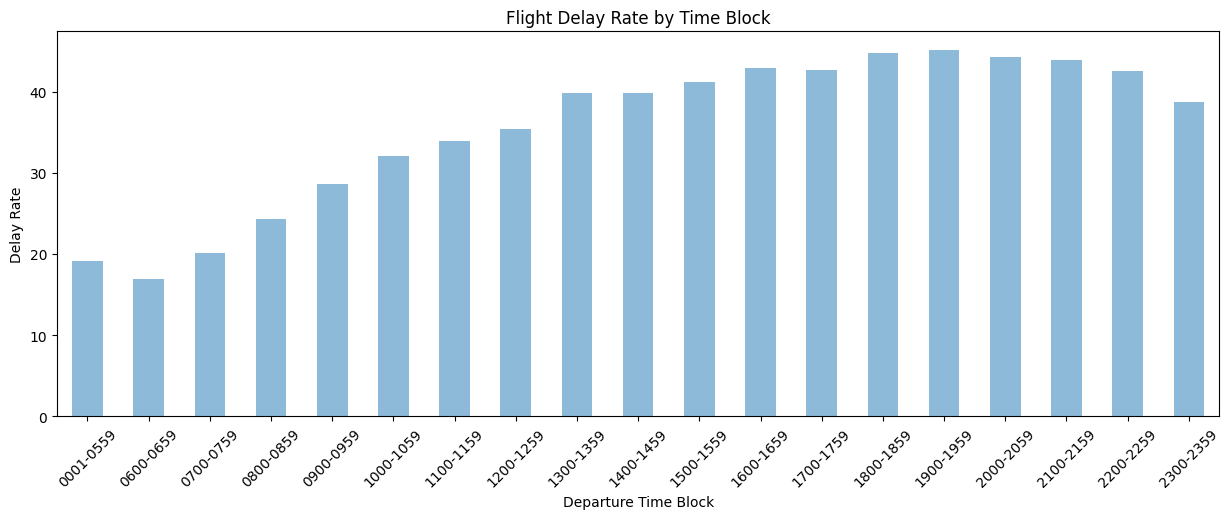

In [21]:
# Create a table including delay counts and total flights count to calculate the delay rate 
join_tab = (pd.concat([del_num, total_num], axis = 1))
join_tab.columns = ["Delay Counts","Total Counts"]
join_tab['Rate'] = (join_tab['Delay Counts'] / join_tab['Total Counts']) * 100
join_tab['Rate'].plot(kind='bar', alpha = 0.5,title = 'Flight Delay Rate by Time Block', figsize = (15,5))
plt.xlabel("Departure Time Block")
plt.ylabel("Delay Rate")
plt.xticks(rotation = 45)
plt.show()

#### 3. Quarter

Text(0.5, 1.0, 'The Departure Delay Count and Arrival Delay Count by Quarter')

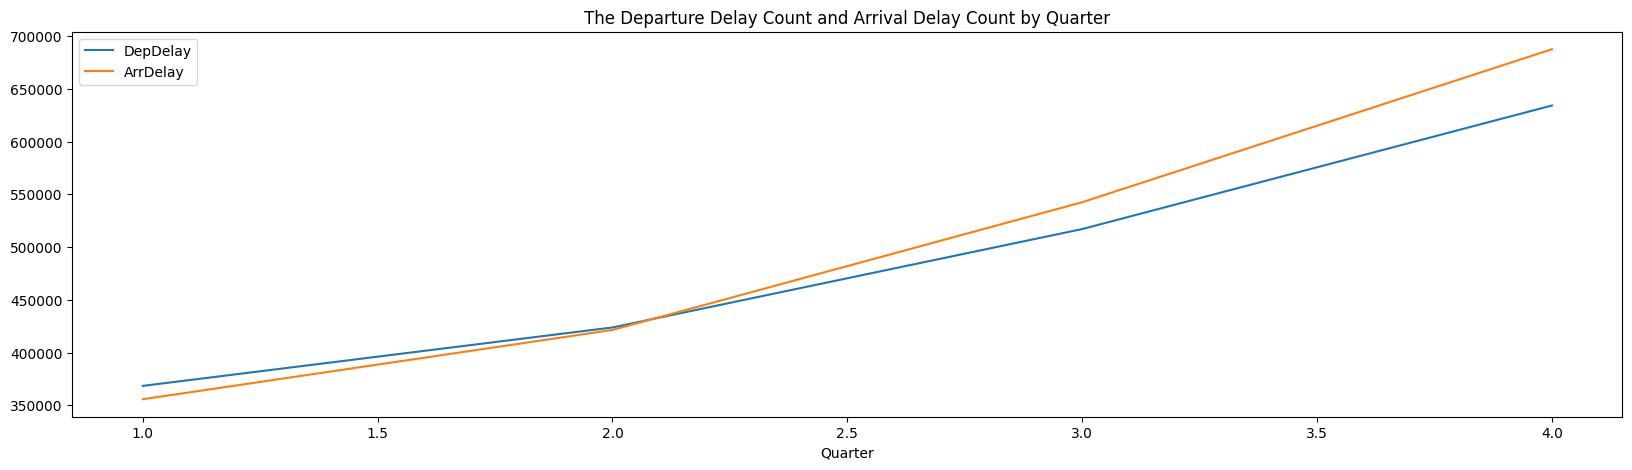

In [22]:
# For delay flights:
plt.figure(figsize=(20,5))
FB_Dep.groupby(['Quarter'])['DepDelay'].count().plot(legend = True)
FB_Arr.groupby(['Quarter'])['ArrDelay'].count().plot(legend = True)
plt.title("The Departure Delay Count and Arrival Delay Count by Quarter")

In [23]:
# save the delay counts by quarter and the total flight counts by quarter into dataframe 
quarter_delay = FB_Dep.groupby(['Quarter'])['DepDelay'].count().to_frame()
quarter_tt = flight.groupby(['Quarter'])['DepDelay'].count().to_frame()

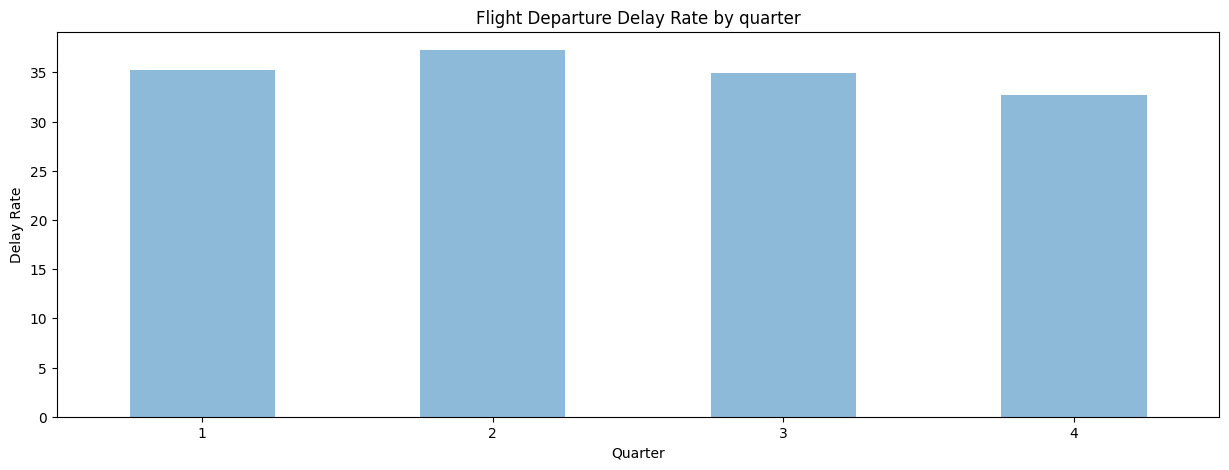

In [24]:
# Create a table including delay counts by quarter and total flights count by quarter to calculate the delay rate 
quarter_tab = (pd.concat([quarter_delay, quarter_tt], axis = 1))
quarter_tab.columns = ["quarter_delay Counts","quarter_tt Counts"]
quarter_tab['Rate'] = (quarter_tab['quarter_delay Counts'] / quarter_tab['quarter_tt Counts']) * 100
quarter_tab['Rate'].plot(kind='bar',alpha = 0.5, title = 'Flight Departure Delay Rate by quarter', figsize = (15,5))
plt.xlabel("Quarter")
plt.ylabel("Delay Rate")
plt.xticks(rotation = 360)
plt.show()

#### 4. Month

In [25]:
Month_delay = FB_Dep.groupby(['Month'])['DepDelay'].count().to_frame()
Month_tt = flight.groupby(['Month'])['DepDelay'].count().to_frame()

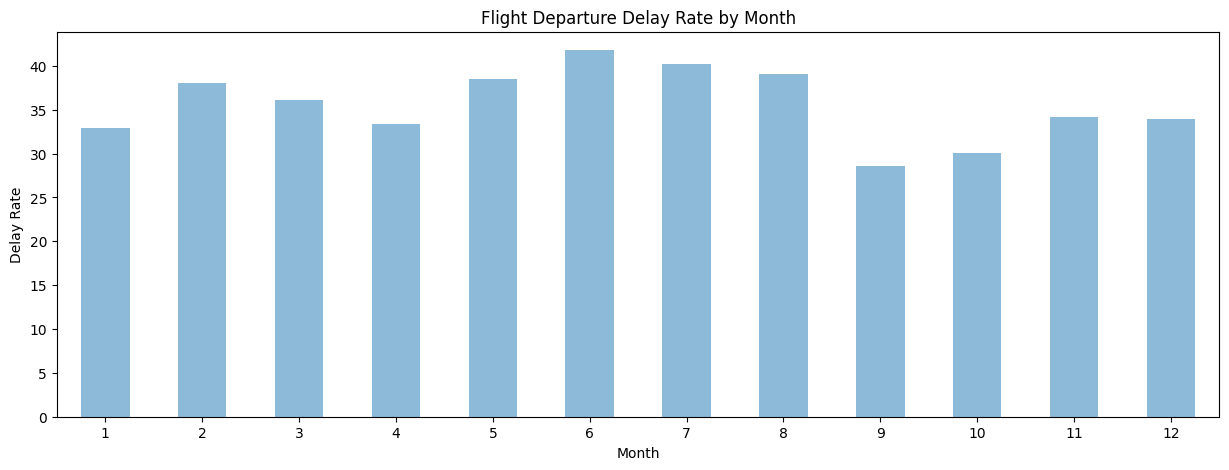

In [26]:
Month_tab = (pd.concat([Month_delay, Month_tt], axis = 1))
Month_tab.columns = ["Month_delay Counts","Month_tt Counts"]
Month_tab['Rate'] = (Month_tab['Month_delay Counts'] / Month_tab['Month_tt Counts']) * 100
Month_tab['Rate'].plot(kind='bar', alpha = 0.5,title = 'Flight Departure Delay Rate by Month', figsize = (15,5))
plt.xlabel("Month")
plt.ylabel("Delay Rate")
plt.xticks(rotation = 0)
plt.show()

#### 5. Day of the Week

In [27]:
DoW_delay = FB_Dep.groupby(['DayOfWeek'])['DepDelay'].count().to_frame()
DoW_tt = flight.groupby(['DayOfWeek'])['DepDelay'].count().to_frame()

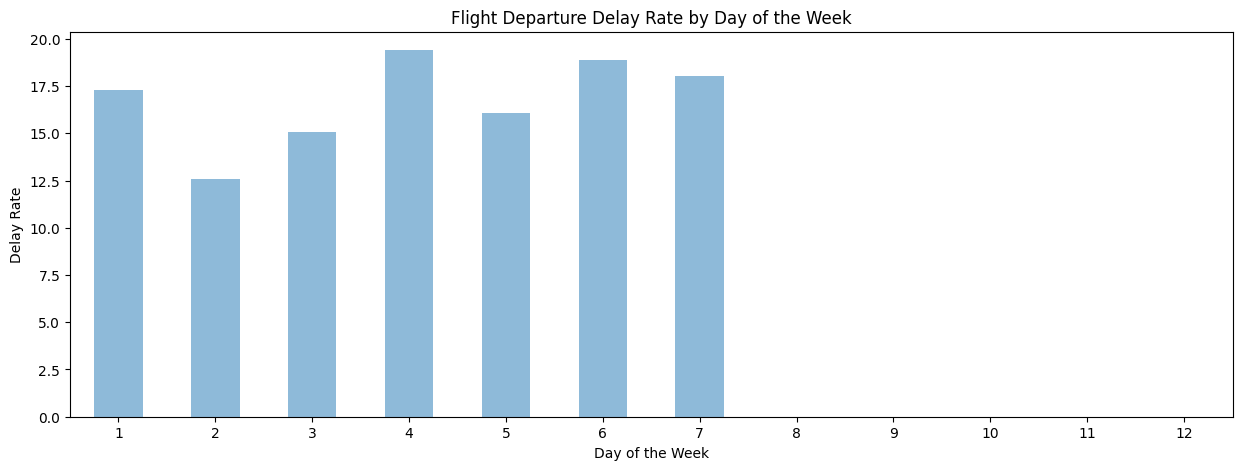

In [28]:
DoW_tab = (pd.concat([Month_delay, DoW_tt], axis = 1))
DoW_tab.columns = ["DoW_delay Counts","DoW_tt Counts"]
DoW_tab['Rate'] = (DoW_tab['DoW_delay Counts'] / DoW_tab['DoW_tt Counts']) * 100
DoW_tab['Rate'].plot(kind='bar', alpha = 0.5,title = 'Flight Departure Delay Rate by Day of the Week', figsize = (15,5))
plt.xlabel("Day of the Week")
plt.ylabel("Delay Rate")
plt.xticks(rotation = 0)
plt.show()

#### 6. Day of the Month

In [29]:
DoM_delay = FB_Dep.groupby(['DayofMonth'])['DepDelay'].count().to_frame()
DoM_tt = flight.groupby(['DayofMonth'])['DepDelay'].count().to_frame()
DoM_tab = (pd.concat([DoM_delay, DoM_tt], axis = 1))
DoM_tab.columns = ["DoM_delay Counts","DoM_tt Counts"]
DoM_tab['Rate'] = (DoM_tab['DoM_delay Counts'] / DoM_tab['DoM_tt Counts']) * 100

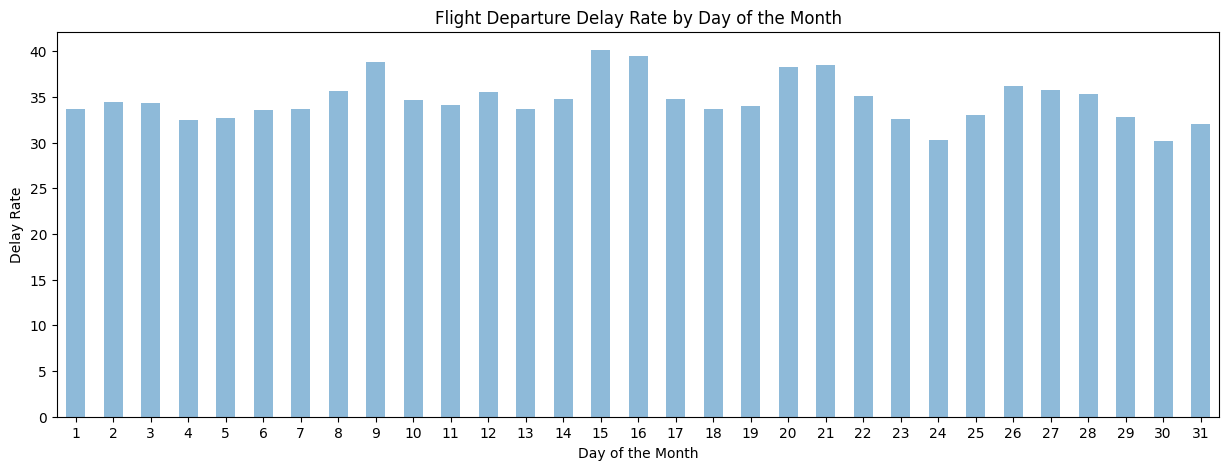

In [30]:
DoM_tab['Rate'].plot(kind='bar', alpha = 0.5,title = 'Flight Departure Delay Rate by Day of the Month', figsize = (15,5))
plt.xlabel("Day of the Month")
plt.ylabel("Delay Rate")
plt.xticks(rotation = 0)
plt.show()

#### 7. Flights number counts by Time Referrence

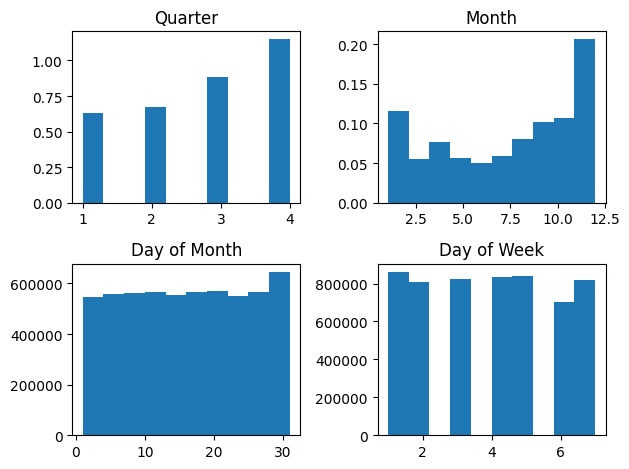

In [31]:
# flight counts by quarter, month, day of the month and day of the week:
n_bins = 10
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(nrows=2, ncols=2)

ax0.hist(flight['Quarter'], n_bins, density=True, histtype='bar', stacked = True)
ax0.set_title('Quarter')

ax1.hist(flight['Month'], n_bins, density=True, histtype='bar', stacked=True)
ax1.set_title('Month')

ax2.hist(flight['DayofMonth'], n_bins, histtype='bar', stacked=True)
ax2.set_title('Day of Month')

ax3.hist(flight['DayOfWeek'], n_bins, histtype='bar', stacked=True)
ax3.set_title('Day of Week')

fig.tight_layout()
plt.show()

#### 8. Distance

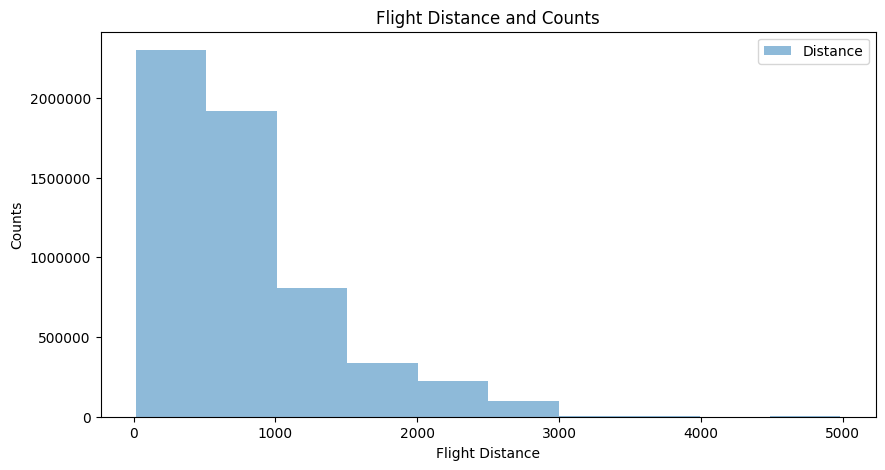

In [32]:
# plot the histogram of the flights by distance
plt.figure(figsize = (10,5))
plt.hist(flight['Distance'], alpha = 0.5, label='Distance')
plt.legend(loc='upper right')
plt.xlabel("Flight Distance")
plt.ylabel("Counts")
plt.ticklabel_format(style='plain')
plt.title('Flight Distance and Counts')
plt.show()

#### 9. AirTime & RSElapsedTime & ActualElapsedTime

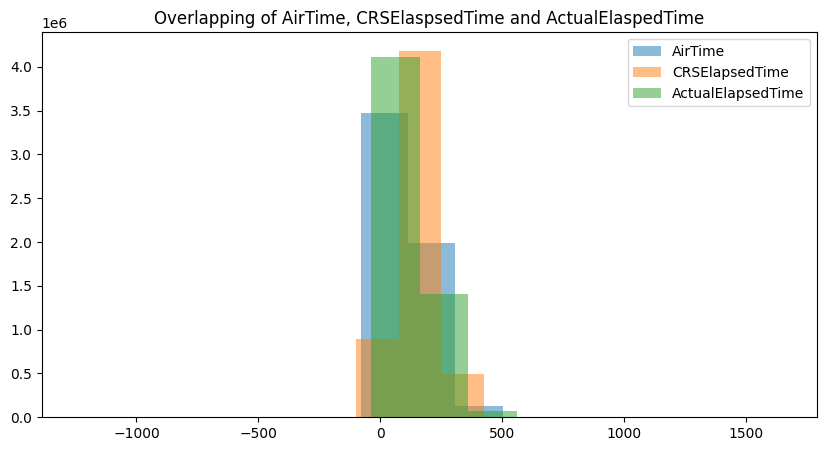

In [33]:
# Create an overlap histogram of the AirTime, CRSElapsedTime, ActualElapsedTime
plt.figure(figsize = (10,5))
plt.hist(flight_delay['AirTime'], alpha = 0.5, label='AirTime')
plt.hist(flight_delay['CRSElapsedTime'], alpha = 0.5, label='CRSElapsedTime')
plt.hist(flight_delay['ActualElapsedTime'], alpha = 0.5, label='ActualElapsedTime')
plt.legend(loc='upper right')
plt.title('Overlapping of AirTime, CRSElaspsedTime and ActualElaspedTime')
plt.show()

#### 10. Delay ( Departure Delay & Arrival Delay)

In [34]:
# Create a new dataframe to include all the departure delay and arrival delay data
Delay = flight_delay[((flight_delay['DepDelay'] > 0) | (flight_delay['ArrDelay'] > 0))]

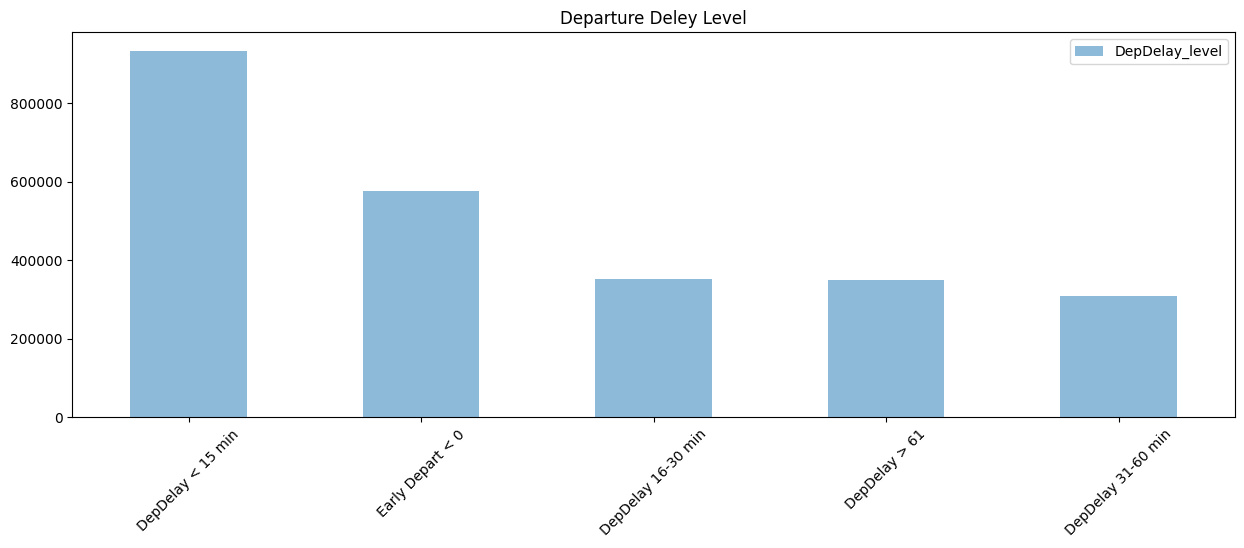

In [35]:
# Plot the departure delay counts by different departure delay level
DepDelay_fig = Delay['DepDelay_level'].value_counts().to_frame()
DepDelay_fig.plot(kind='bar',alpha = 0.5, title = 'Departure Deley Level', figsize = (15,5))
plt.xticks(rotation =45)
plt.show()

In [36]:
# DepDelay_level and ArrDelay_level percentage table:
delay_table = pd.crosstab(Delay['DepDelay_level'], 
                            Delay['ArrDelay_level'],
                               normalize='index').round(4)*100
delay_table.style.background_gradient(cmap="Blues")

ArrDelay_level,ArrDelay 16-30 min,ArrDelay 31-60 min,ArrDelay < 15 min,ArrDelay > 61,Early Arrival < 0
DepDelay_level,,,,,
DepDelay 16-30 min,36.630000,12.490000,40.470000,1.640000,8.770000
DepDelay 31-60 min,26.920000,57.550000,5.270000,9.750000,0.510000
DepDelay < 15 min,8.540000,2.650000,36.860000,0.450000,51.500000
DepDelay > 61,0.200000,11.940000,0.020000,87.840000,0.000000
Early Depart < 0,14.950000,5.010000,79.080000,0.960000,0.000000


#### Departure Delay only:

In [37]:
# create a new datafram for departure delay flights only
Dep_Delay = Delay[Delay['DepDelay'] > 0.0 ]

In [38]:
# For DepDelay data only: DepDelay_level and ArrDelay_level percentage table:
Dep_delay_table = pd.crosstab(Dep_Delay['DepDelay_level'], 
                            Dep_Delay['ArrDelay_level'],
                               normalize='index').round(4)*100
Dep_delay_table.style.background_gradient(cmap="Blues")

ArrDelay_level,ArrDelay 16-30 min,ArrDelay 31-60 min,ArrDelay < 15 min,ArrDelay > 61,Early Arrival < 0
DepDelay_level,,,,,
DepDelay 16-30 min,36.630000,12.490000,40.470000,1.640000,8.770000
DepDelay 31-60 min,26.920000,57.550000,5.270000,9.750000,0.510000
DepDelay < 15 min,8.540000,2.650000,36.860000,0.450000,51.500000
DepDelay > 61,0.200000,11.940000,0.020000,87.840000,0.000000


In [39]:
# create a new datafram for arrival delay flights only
Arr_Delay = Delay[Delay['ArrDelay'] > 0.0 ]

In [40]:
# For ArrDelay data only: DepDelay_level and ArrDelay_level percentage table:
Arr_delay_table = pd.crosstab(Arr_Delay['ArrDelay_level'],
                              Arr_Delay['DepDelay_level'], 
                               normalize='index').round(4)*100
Arr_delay_table.style.background_gradient(cmap="Blues")

DepDelay_level,DepDelay 16-30 min,DepDelay 31-60 min,DepDelay < 15 min,DepDelay > 61,Early Depart < 0
ArrDelay_level,,,,,
ArrDelay 16-30 min,33.960000,21.990000,21.070000,0.180000,22.800000
ArrDelay 31-60 min,13.820000,56.060000,7.800000,13.200000,9.120000
ArrDelay < 15 min,14.800000,1.700000,35.890000,0.010000,47.600000
ArrDelay > 61,1.630000,8.520000,1.190000,87.100000,1.570000


In [41]:
# for DepDelay datagroup, "DepDelay < 15 min" has 51.5% of flights can "Early Arrival < 0"
Dep15 = Dep_Delay[Dep_Delay['DepDelay_level'] == 'DepDelay < 15 min']

In [42]:
Distance1 = Dep15[Dep15['ArrDelay_level'] == 'Early Arrival < 0']

In [43]:
# keep track of the flight distance
Dep15EarlyArr = (pd.DataFrame(Distance1['Distance_level'].value_counts().to_frame())).join(
([pd.DataFrame(Distance1.groupby(['Distance_level'])['DepDelay'].mean()), 
 pd.DataFrame(Distance1.groupby(['Distance_level'])['ArrDelay'].mean().to_frame())]))
Dep15EarlyArr.columns = ['Flight_counts', 'Avg_DepDelay min', 'Avg_ArrDelay min']
Dep15EarlyArr.style.background_gradient(cmap="Blues")

,Flight_counts,Avg_DepDelay min,Avg_ArrDelay min
Distance 300-600 mile,122183,4.744375,-6.249274
Distance 600-900 mile,99231,5.098104,-7.705818
Distance 900-1200 mile,81472,5.315998,-8.817876
Distance < 300,59909,4.682034,-5.944516
Distance 1200-1500 mile,35710,5.385690,-10.021395
Distance 1500-1800 mile,33938,5.411780,-10.970181
Distance 2400-2700 mile,15605,5.511246,-13.176546
Distance 1800-2100 mile,15182,5.506982,-11.415821
Distance 2100-2400 mile,14618,5.489602,-12.384389
Distance > 2700 mile,2943,5.504247,-12.791030


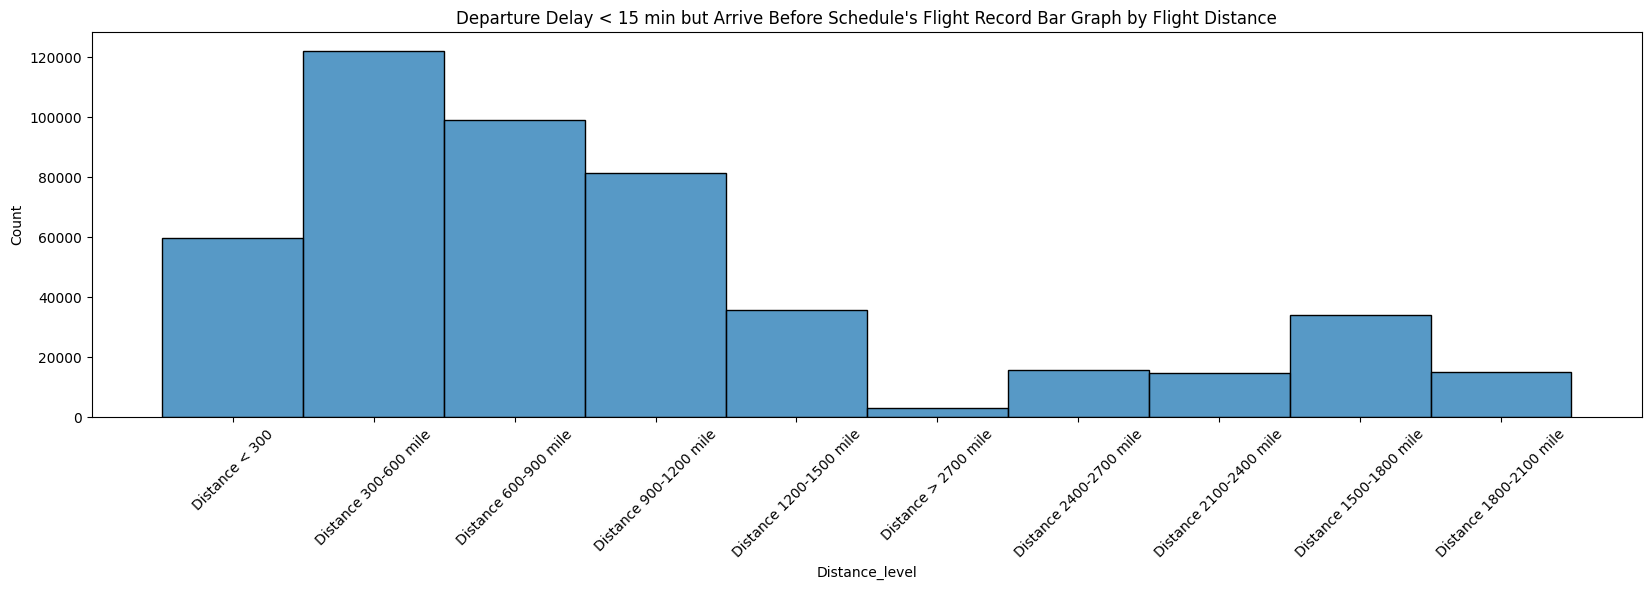

In [44]:
plt.figure(figsize=(20,5))
Distance_fig1 = sns.histplot(Distance1["Distance_level"])
plt.title("Departure Delay < 15 min but Arrive Before Schedule's Flight Record Bar Graph by Flight Distance")
plt.xticks(rotation = 45)
plt.show()

In [45]:
# for DepDelay datagroup, "DepDelay 16 - 30 min", has 40.5% chance can "ArrDelay < 15 min"
Dep30 = Dep_Delay[Dep_Delay['DepDelay_level'] == 'DepDelay 16-30 min']
Distance2 = Dep30[Dep30['ArrDelay_level'] == 'ArrDelay < 15 min']

In [46]:
# keep track of the flight distance
Dep30Arr15 = (pd.DataFrame(Distance2['Distance_level'].value_counts().to_frame())).join(
([Distance2.groupby(['Distance_level'])['DepDelay'].mean(), 
Distance2.groupby(['Distance_level'])['ArrDelay'].mean()]))
Dep30Arr15.columns = ['Flight_counts', 'Avg_DepDelay min', 'Avg_ArrDelay min']
Dep30Arr15.style.background_gradient(cmap="Blues")

,Flight_counts,Avg_DepDelay min,Avg_ArrDelay min
Distance 300-600 mile,40409,20.475587,9.660422
Distance 600-900 mile,30433,21.034272,9.030723
Distance 900-1200 mile,23539,21.304728,8.718595
Distance < 300,21378,20.436898,9.813126
Distance 1200-1500 mile,8904,21.506402,8.479447
Distance 1500-1800 mile,7643,21.683370,8.311396
Distance 1800-2100 mile,3201,21.704780,8.218057
Distance 2400-2700 mile,3106,21.650032,7.977785
Distance 2100-2400 mile,2752,21.701672,8.105015
Distance > 2700 mile,552,21.605072,8.041667


Thus we know if the depart delay is between 16 - 30 min, it still shows the same result, but the time difference based on the distance is not that obvious.

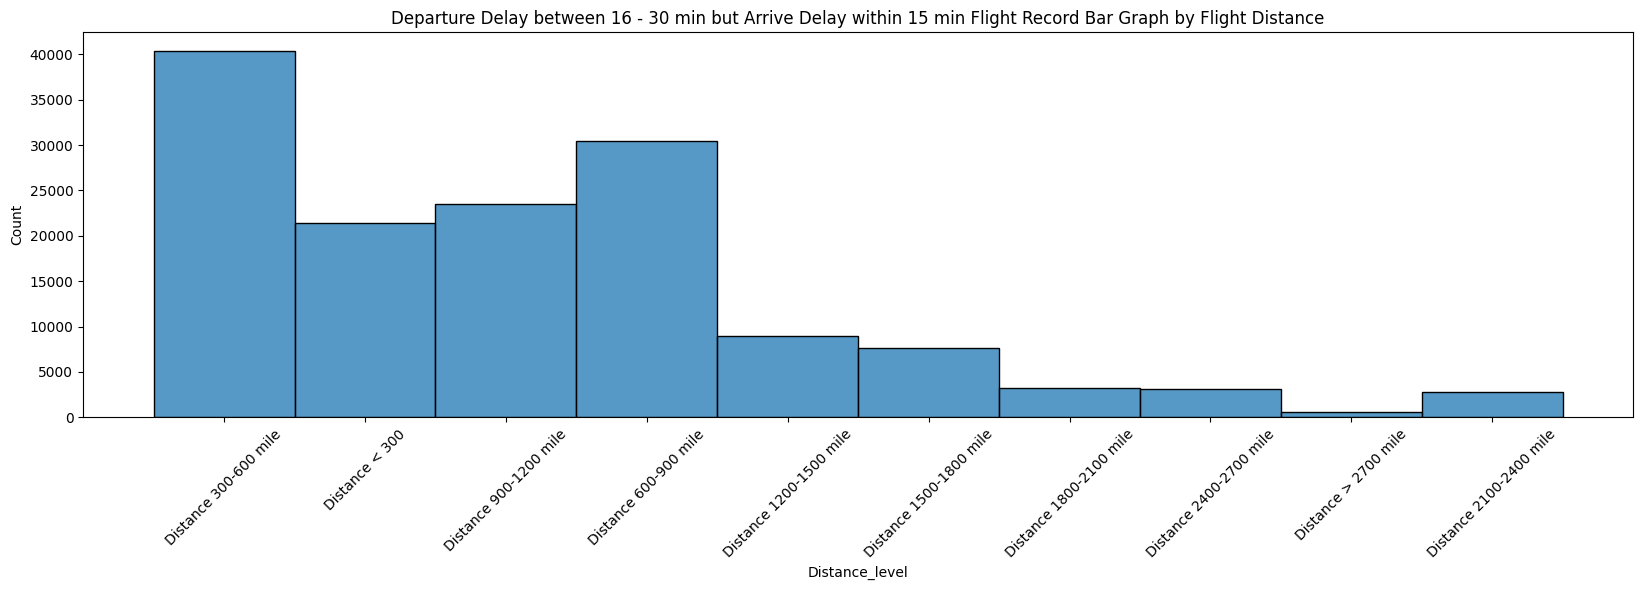

In [47]:
plt.figure(figsize=(20,5))
Distance_fig1 = sns.histplot(Distance2["Distance_level"])
plt.title("Departure Delay between 16 - 30 min but Arrive Delay within 15 min Flight Record Bar Graph by Flight Distance")
plt.xticks(rotation = 45)
plt.show()

In [48]:
# The DepDelay > 61 has 87.84% chance to "ArrDelay > 61", let's see their distance:
Dep60 = Dep_Delay[Dep_Delay['DepDelay_level'] == 'DepDelay > 61']
Distance3 = Dep60[Dep60['ArrDelay_level'] == 'ArrDelay > 61']

In [49]:
# keep track of the flight distance
Dep60Arr60 = (Distance3['Distance_level'].value_counts().to_frame()).join(
([Distance3.groupby(['Distance_level'])['DepDelay'].mean(), 
Distance3.groupby(['Distance_level'])['ArrDelay'].mean()]))
Dep60Arr60.columns = ['Flight_counts', 'Avg_DepDelay min', 'Avg_ArrDelay min']
Dep60Arr60.style.background_gradient(cmap="Blues")

,Flight_counts,Avg_DepDelay min,Avg_ArrDelay min
Distance 300-600 mile,86230,142.162971,141.534802
Distance 600-900 mile,63562,144.270366,143.216670
Distance < 300,58886,148.746833,148.818955
Distance 900-1200 mile,49911,145.931738,143.938911
Distance 1200-1500 mile,16071,147.162653,144.013440
Distance 1500-1800 mile,13154,142.467842,139.015205
Distance 2400-2700 mile,8092,153.311172,149.922269
Distance 2100-2400 mile,5458,149.825944,145.118542
Distance 1800-2100 mile,5167,141.982582,137.553706
Distance > 2700 mile,1321,179.829674,174.101438


#### 10. Airline

In [50]:
# group the flight delay and total counts by airline, and calculate the delay rate of each airline
Airline_Delay = FB_Dep.groupby(['Airline'])['DepDelay'].count().to_frame()
Airline_Total = flight_delay.groupby(['Airline'])['DepDelay'].count().to_frame()
Airline_tab = (pd.concat([Airline_Delay, Airline_Total], axis = 1))
Airline_tab.columns = ["Airline_delay Counts","Airline_Total Counts"]
Airline_tab['Rate'] = (Airline_tab['Airline_delay Counts'] / Airline_tab['Airline_Total Counts']) * 100
Airline_tab = Airline_tab.sort_values( "Rate", ascending = False)
Airline_tab.style.background_gradient(cmap="Blues")

,Airline_delay Counts,Airline_Total Counts,Rate
Airline,,,
Southwest Airlines Co.,660551,1331609,49.605477
Frontier Airlines Inc.,53187,117523,45.256673
JetBlue Airways,124396,297758,41.777551
Peninsula Airways Inc.,456,1121,40.677966
"Commutair Aka Champlain Enterprises, Inc.",17658,45509,38.801116
Empire Airlines Inc.,519,1411,36.782424
American Airlines Inc.,133816,378722,35.333569
Allegiant Air,32787,95192,34.443020
Comair Inc.,37928,113211,33.502045


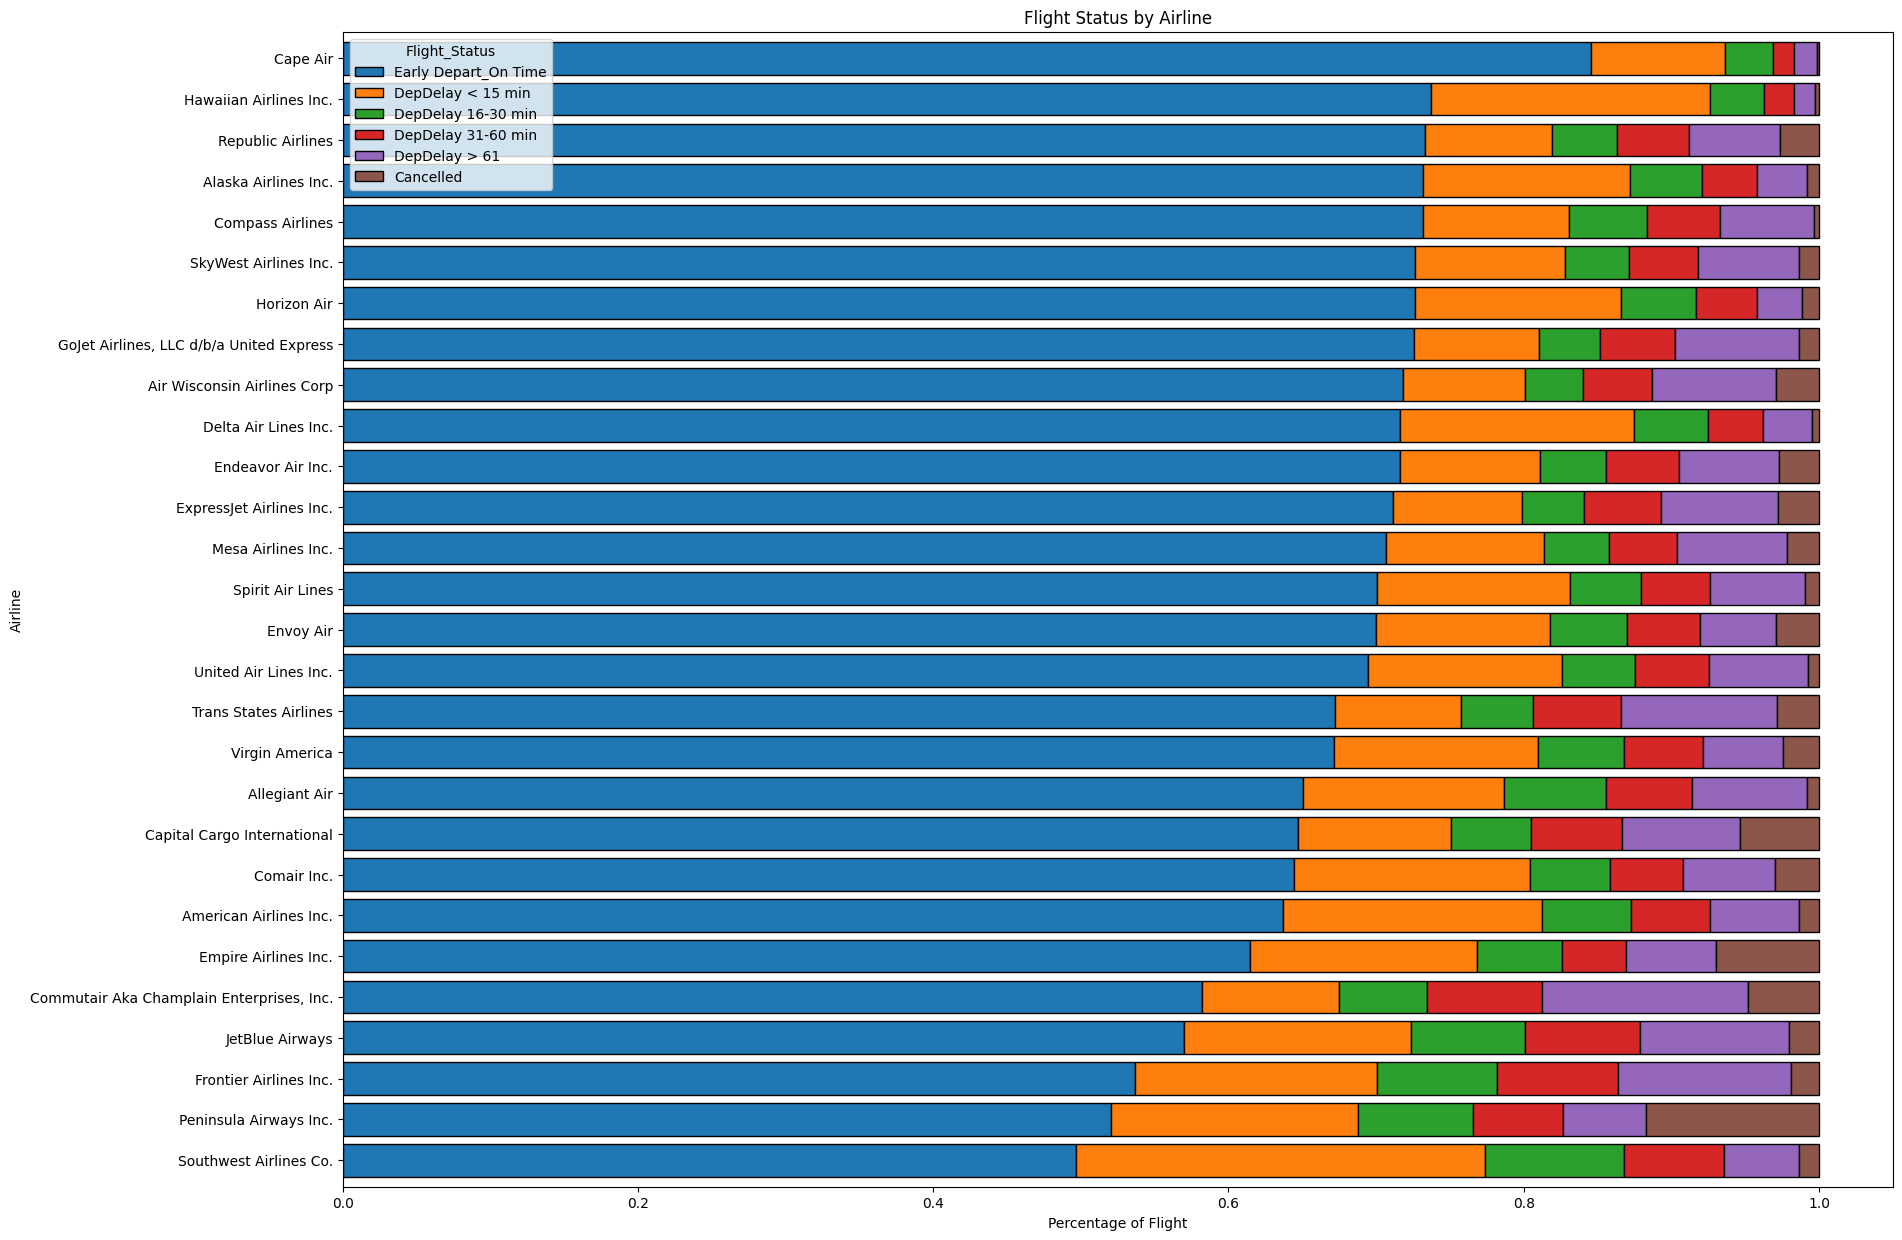

In [51]:
col_order = ["Early Depart_On Time", "DepDelay < 15 min", "DepDelay 16-30 min", "DepDelay 31-60 min","DepDelay > 61", "Cancelled"]
status = flight[['Airline','Flight_Status']]
status = (status.groupby(["Airline"])["Flight_Status"].value_counts(normalize=True).unstack()[col_order])
status.sort_values("Early Depart_On Time").plot(
    kind="barh", stacked=True, width=0.8, edgecolor="black", figsize = (20,15))
plt.title("Flight Status by Airline")     
plt.xlabel("Percentage of Flight")
plt.ylabel("Airline")
plt.show()

#### 11. Airport Size

In [52]:
# group the flight delay and total counts by Airport_Size, and calculate the delay rate 
Origin_Delay = FB_Dep.groupby(['Airport_Size'])['DepDelay'].count().to_frame()
Origin_Total = flight_delay.groupby(['Airport_Size'])['DepDelay'].count().to_frame()
Airport_tab = (pd.concat([Origin_Delay, Origin_Total], axis = 1))
Airport_tab.columns = ["Origin_Delay Counts","Origin_Total Counts"]
Airport_tab['Rate'] = (Airport_tab['Origin_Delay Counts'] / Airport_tab['Origin_Total Counts']) * 100
Airport_tab = Airport_tab.sort_values("Rate", ascending = False).head(50)
Airport_tab.style.background_gradient(cmap="Blues")

,Origin_Delay Counts,Origin_Total Counts,Rate
Airport_Size,,,
Medium,1354572,3719842,36.414772
Large,331191,934772,35.430137
Small,257783,924004,27.898472


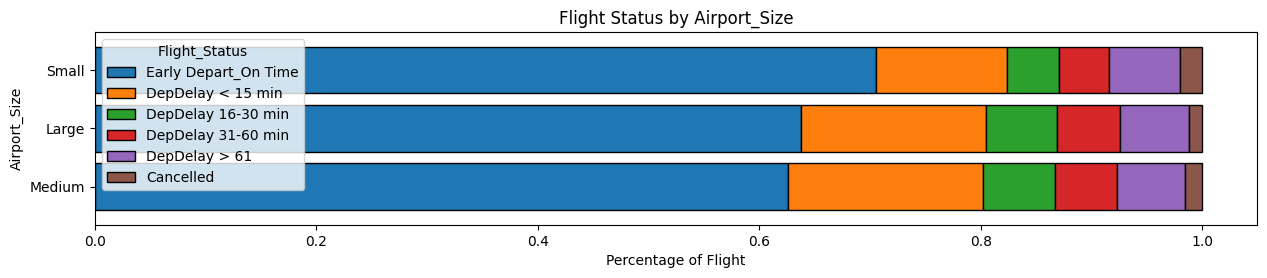

In [53]:
col_order = ["Early Depart_On Time", "DepDelay < 15 min", "DepDelay 16-30 min", "DepDelay 31-60 min","DepDelay > 61", "Cancelled"]
airport_status = flight[['Airport_Size','Flight_Status']]
airport_status = (airport_status.groupby(["Airport_Size"])["Flight_Status"].value_counts(normalize=True).unstack()[col_order])
airport_status.sort_values("Early Depart_On Time").plot(
    kind="barh", stacked=True, width=0.8, edgecolor="black", figsize = (15,2.5))
plt.title("Flight Status by Airport_Size") 
plt.xlabel("Percentage of Flight")
plt.ylabel("Airport_Size")

plt.show()

# Part 3: Exploratory Data Analysis (EDA)

In [55]:
flights = pd.read_csv('Combined_Flights_2018.csv')

In [56]:
# new dataset with only the variables that will be in the model
flights_reduced = flights[['Airline', 'Origin', 'Dest', 'Month', 'DayOfWeek', 
                 'Distance', 'Cancelled', 'ArrDel15']]

In [57]:
flights_reduced.head(10)

,Airline,Origin,Dest,Month,DayOfWeek,Distance,Cancelled,ArrDel15
0,Endeavor Air Inc.,ABY,ATL,1,2,145.0,False,0.0
1,Endeavor Air Inc.,ABY,ATL,1,3,145.0,False,0.0
2,Endeavor Air Inc.,ABY,ATL,1,4,145.0,False,0.0
3,Endeavor Air Inc.,ABY,ATL,1,5,145.0,False,0.0
4,Endeavor Air Inc.,ABY,ATL,1,6,145.0,False,0.0
5,Endeavor Air Inc.,ABY,ATL,1,7,145.0,False,1.0
6,Endeavor Air Inc.,ABY,ATL,1,1,145.0,False,0.0
7,Endeavor Air Inc.,ABY,ATL,1,2,145.0,False,0.0
8,Endeavor Air Inc.,ABY,ATL,1,3,145.0,False,NaN
9,Endeavor Air Inc.,ATL,ABY,1,3,145.0,False,1.0


In [58]:
flights_reduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5689512 entries, 0 to 5689511
Data columns (total 8 columns):
 #   Column     Dtype  
---  ------     -----  
 0   Airline    object 
 1   Origin     object 
 2   Dest       object 
 3   Month      int64  
 4   DayOfWeek  int64  
 5   Distance   float64
 6   Cancelled  bool   
 7   ArrDel15   float64
dtypes: bool(1), float64(2), int64(2), object(3)
memory usage: 309.3+ MB


In [59]:
# Descriptive statistics for our variables of type 'object'
flights_reduced.describe(include='object')

,Airline,Origin,Dest
count,5689512,5689512,5689512
unique,28,370,370
top,Southwest Airlines Co.,ORD,ORD
freq,1352552,289451,289405


In [60]:
# Descriptive statistics for 'Distance'
flights_reduced['Distance'].describe().round()

count    5689512.0
mean         788.0
std          594.0
min           16.0
25%          349.0
50%          628.0
75%         1024.0
max         4983.0
Name: Distance, dtype: float64

Reduced dataset to be used for relationships with cancelled:

In [61]:
flights_can = flights_reduced[['Airline', 'Origin', 'Dest', 'Month', 'DayOfWeek', 'Distance', 'Cancelled']]

In [62]:
# check how many null values for each variable
flights_can.isnull().sum()

Airline      0
Origin       0
Dest         0
Month        0
DayOfWeek    0
Distance     0
Cancelled    0
dtype: int64

In [63]:
# check how many true and false cancelled values
flights_can['Cancelled'].value_counts()

False    5601139
True       88373
Name: Cancelled, dtype: int64

Reduced dataset to be used for relationships with delayed:

In [64]:
flights_delay = flights_reduced[['Airline', 'Origin', 'Dest', 'Month', 'DayOfWeek', 'Distance', 'ArrDel15']]

In [65]:
# check how many null values for each variable
flights_delay.isnull().sum()

Airline           0
Origin            0
Dest              0
Month             0
DayOfWeek         0
Distance          0
ArrDel15     102893
dtype: int64

In [66]:
# drop records with NaN delay values
flights_del = flights_delay.dropna()

In [67]:
# add a column called 'Delayed' which is a boolean of arrival delays
flights_del['Delayed'] = np.where(flights_del['ArrDel15'] > 0, 'True', 'False')
flights_del.head(10)

,Airline,Origin,Dest,Month,DayOfWeek,Distance,ArrDel15,Delayed
0,Endeavor Air Inc.,ABY,ATL,1,2,145.0,0.0,False
1,Endeavor Air Inc.,ABY,ATL,1,3,145.0,0.0,False
2,Endeavor Air Inc.,ABY,ATL,1,4,145.0,0.0,False
3,Endeavor Air Inc.,ABY,ATL,1,5,145.0,0.0,False
4,Endeavor Air Inc.,ABY,ATL,1,6,145.0,0.0,False
5,Endeavor Air Inc.,ABY,ATL,1,7,145.0,1.0,True
6,Endeavor Air Inc.,ABY,ATL,1,1,145.0,0.0,False
7,Endeavor Air Inc.,ABY,ATL,1,2,145.0,0.0,False
9,Endeavor Air Inc.,ATL,ABY,1,3,145.0,1.0,True
10,Endeavor Air Inc.,ATL,ABY,1,4,145.0,0.0,False


#### 1. Airline

<AxesSubplot: title={'center': 'Normalized Bar Graph of Airlines and Cancellation'}, xlabel='Airline'>

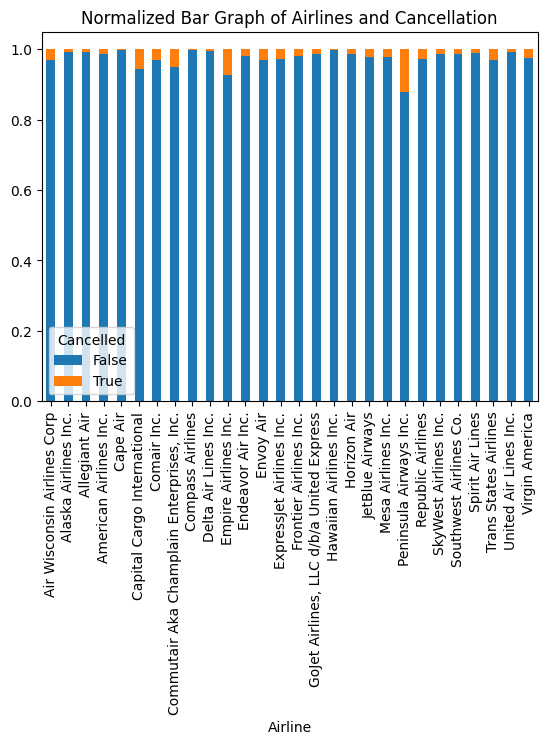

In [69]:
# create a normalized bar graph of cancellation rates for each airline
crosstab_01 = pd.crosstab(flights_can['Airline'], flights_can['Cancelled'])
crosstab_norm = crosstab_01.div(crosstab_01.sum(1),axis = 0)
crosstab_norm.plot(kind='bar', stacked = True, title = 'Normalized Bar Graph of Airlines and Cancellation')

<AxesSubplot: title={'center': 'Normalized Bar Graph of Airlines and Delays'}, xlabel='Airline'>

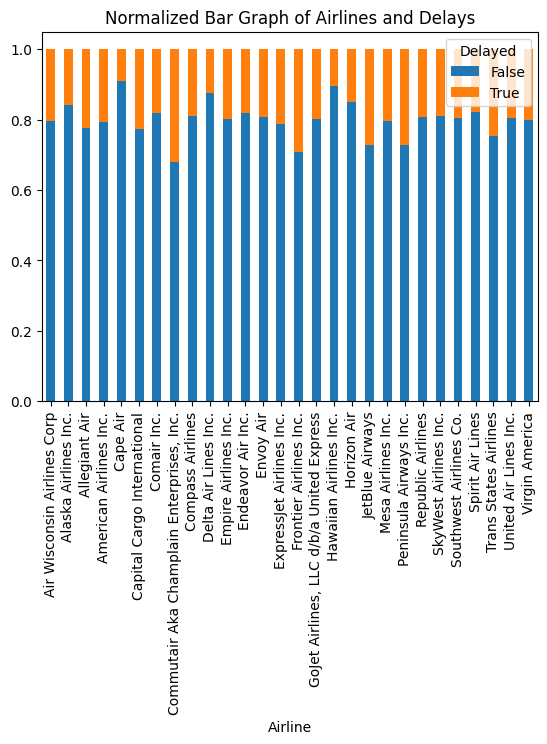

In [70]:
# create a normalized bar graph of arrival delay rates for each airline
crosstab_02 = pd.crosstab(flights_del['Airline'], flights_del['Delayed'])
crosstab_norm2 = crosstab_02.div(crosstab_02.sum(1),axis = 0)
crosstab_norm2.plot(kind='bar', stacked = True, title = 'Normalized Bar Graph of Airlines and Delays')

#### 2&3. Origin and Destination Airports

In [71]:
# obtain the unique values for the origin variable 
flights_reduced['Origin'].unique()

array(['ABY', 'ATL', 'MOB', 'BUF', 'DFW', 'BTV', 'CVG', 'LGA', 'CHO',
       'EWN', 'MCI', 'MGM', 'MSP', 'DCA', 'FAY', 'OAJ', 'STL', 'CWA',
       'DTW', 'RDU', 'SRQ', 'AEX', 'AUS', 'CSG', 'EVV', 'IND', 'CLE',
       'PIA', 'TRI', 'BGR', 'IAD', 'PWM', 'TYS', 'GSO', 'AVL', 'BTR',
       'MKE', 'CMH', 'GRR', 'GSP', 'BIS', 'ORD', 'ROC', 'CHA', 'TVC',
       'FSM', 'JAX', 'BOS', 'GRB', 'TUL', 'VLD', 'CRW', 'IAH', 'XNA',
       'JAN', 'SAV', 'CHS', 'ROA', 'GFK', 'SYR', 'MDT', 'SAT', 'BMI',
       'LFT', 'BNA', 'PHL', 'BQK', 'ORF', 'GNV', 'OMA', 'TPA', 'BWI',
       'MEM', 'MBS', 'SDF', 'LEX', 'CLT', 'DAY', 'MOT', 'FAR', 'CAE',
       'DSM', 'PIT', 'DHN', 'MHT', 'ILM', 'SGF', 'ELM', 'BDL', 'MCO',
       'RIC', 'SHV', 'MSY', 'HSV', 'TLH', 'LAN', 'LIT', 'GRK', 'MSN',
       'ATW', 'HRL', 'HPN', 'CAK', 'EWR', 'RSW', 'BQN', 'PBI', 'FLL',
       'SLC', 'PSE', 'JFK', 'SJC', 'LAS', 'LGB', 'LAX', 'SFO', 'SJU',
       'HOU', 'DEN', 'SEA', 'STT', 'PVD', 'PDX', 'SAN', 'RNO', 'ALB',
       'PHX', 'OAK',

In [72]:
# obtain the unique values for the dest variable 
flights_reduced['Dest'].unique()

array(['ATL', 'ABY', 'MOB', 'EVV', 'DTW', 'OAJ', 'BOS', 'SYR', 'EWN',
       'MGM', 'LGA', 'MSP', 'CLE', 'CLT', 'FAY', 'JFK', 'STL', 'CMH',
       'IND', 'TYS', 'CWA', 'AEX', 'GRK', 'SAT', 'PIA', 'IAH', 'DFW',
       'RIC', 'PWM', 'AZO', 'CVG', 'TRI', 'IAD', 'AVL', 'BTR', 'BUF',
       'GRR', 'BIS', 'CHA', 'TVC', 'FSM', 'BTV', 'MCI', 'GRB', 'TUL',
       'VLD', 'CRW', 'XNA', 'ROC', 'SAV', 'ROA', 'MDT', 'MSY', 'BNA',
       'RDU', 'MKE', 'GNV', 'TPA', 'GSO', 'CHO', 'BGR', 'GFK', 'BQK',
       'MEM', 'ILM', 'BMI', 'ORF', 'MHT', 'DAY', 'GSP', 'LEX', 'SDF',
       'BDL', 'MBS', 'MOT', 'CAE', 'CSG', 'DSM', 'DHN', 'ELM', 'PIT',
       'JAX', 'DCA', 'ORD', 'SGF', 'SHV', 'HSV', 'OMA', 'TLH', 'MSN',
       'LAN', 'BWI', 'CHS', 'LIT', 'RSW', 'MCO', 'FAR', 'ATW', 'CAK',
       'HRL', 'HPN', 'PHL', 'MLI', 'BQN', 'SFO', 'EWR', 'FLL', 'SLC',
       'PSE', 'SJC', 'LGB', 'LAS', 'LAX', 'PBI', 'SJU', 'SRQ', 'AUS',
       'SWF', 'DEN', 'SEA', 'HOU', 'PVD', 'SMF', 'STT', 'PDX', 'ORH',
       'SAN', 'RNO',

For both of these variables, there are 370 unique airport codes and so we will not create visualizations for their relationships.

#### 4. Month

<AxesSubplot: title={'center': 'Normalized Bar Graph of Month and Cancellations'}, xlabel='Month'>

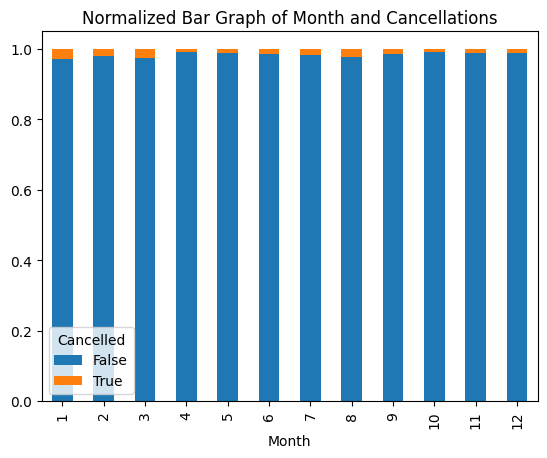

In [73]:
# create a normalized bar graph of cancellation rates for each month
crosstab_03 = pd.crosstab(flights_can['Month'], flights_can['Cancelled'])
crosstab_norm3 = crosstab_03.div(crosstab_03.sum(1),axis = 0)
crosstab_norm3.plot(kind='bar', stacked = True, title = 'Normalized Bar Graph of Month and Cancellations')

<AxesSubplot: title={'center': 'Normalized Bar Graph of Month and Delays'}, xlabel='Month'>

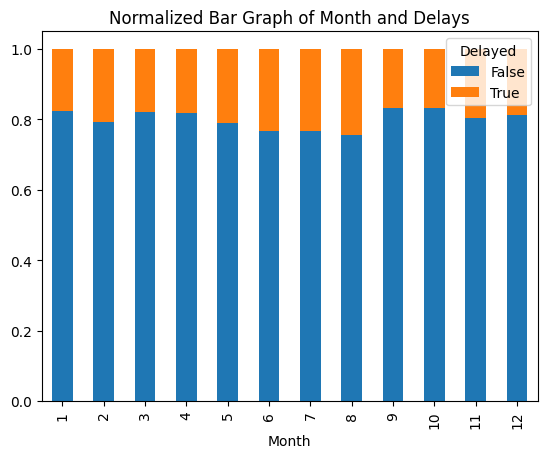

In [75]:
# create a normalized bar graph of arrival delay rates for each month
crosstab_04 = pd.crosstab(flights_del['Month'], flights_del['Delayed'])
crosstab_norm4 = crosstab_04.div(crosstab_04.sum(1),axis = 0)
crosstab_norm4.plot(kind='bar', stacked = True, title = 'Normalized Bar Graph of Month and Delays')

#### 5. Day Of Week

<AxesSubplot: title={'center': 'Normalized Bar Graph of DayOfWeek and Cancellations'}, xlabel='DayOfWeek'>

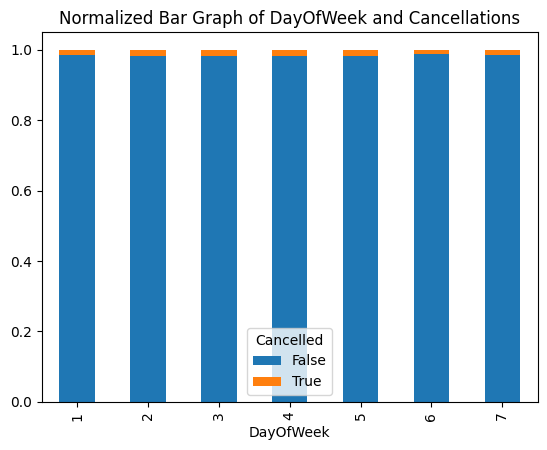

In [76]:
# create a normalized bar graph of cancellation rates for each day of the week
crosstab_05 = pd.crosstab(flights_can['DayOfWeek'], flights_can['Cancelled'])
crosstab_norm5 = crosstab_05.div(crosstab_05.sum(1),axis = 0)
crosstab_norm5.plot(kind='bar', stacked = True, title = 'Normalized Bar Graph of DayOfWeek and Cancellations')

<AxesSubplot: title={'center': 'Normalized Bar Graph of DayOfWeek and Delays'}, xlabel='DayOfWeek'>

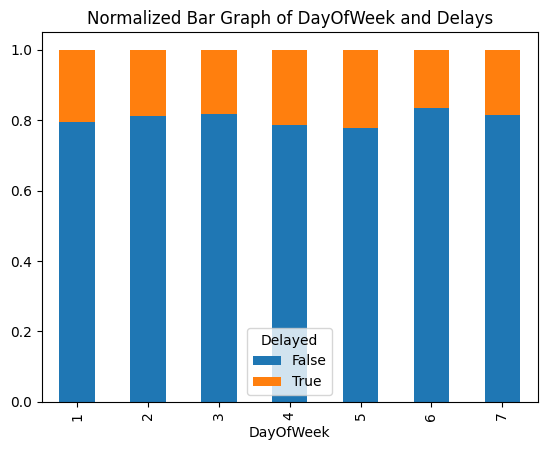

In [77]:
# create a normalized bar graph of arrival delay rates for each day of the week
crosstab_06 = pd.crosstab(flights_del['DayOfWeek'], flights_del['Delayed'])
crosstab_norm6 = crosstab_06.div(crosstab_06.sum(1),axis = 0)
crosstab_norm6.plot(kind='bar', stacked = True, title = 'Normalized Bar Graph of DayOfWeek and Delays')

#### 6. Distance

[Text(0.5, 1.0, 'Violin Plot of Flight Distance and Cancellations')]

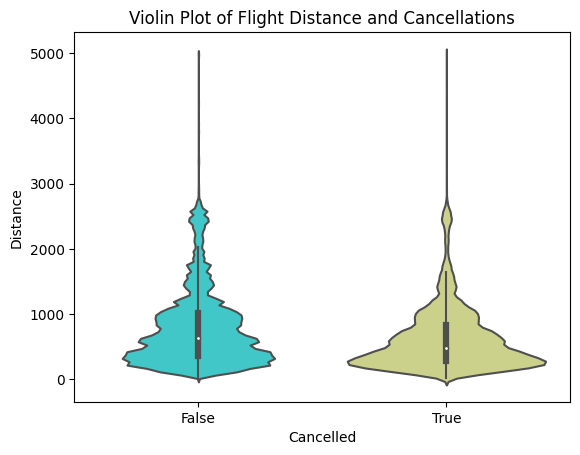

In [78]:
# create a violin plot of relationship between cancellation rates and distance
sns.violinplot(x="Cancelled", y="Distance", data=flights_can,
               palette='rainbow').set(title='Violin Plot of Flight Distance and Cancellations')

[Text(0.5, 1.0, 'Boxplot of Flight Distance and Cancellations')]

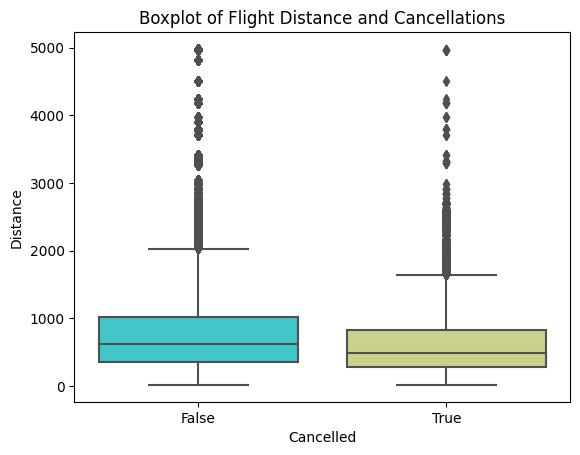

In [79]:
# create a boxplot of relationship between cancellation rates and distance
sns.boxplot(x="Cancelled", y="Distance", data=flights_can,
            palette='rainbow').set(title='Boxplot of Flight Distance and Cancellations')

[Text(0.5, 1.0, 'Violin Plot of Flight Distance and Delays')]

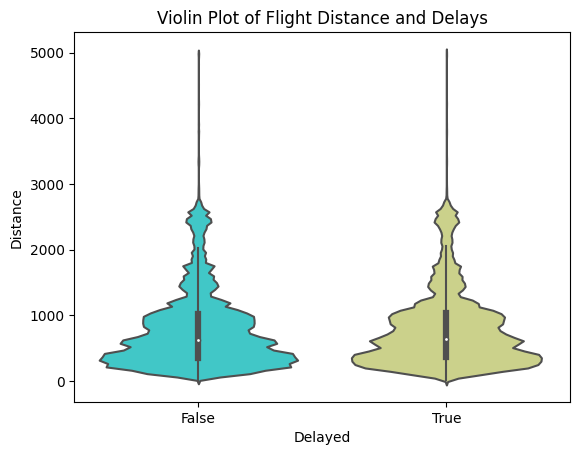

In [80]:
# create a violin plot of relationship between arrival delay rates and distance
sns.violinplot(x="Delayed", y="Distance", data=flights_del,
               palette='rainbow').set(title='Violin Plot of Flight Distance and Delays')

[Text(0.5, 1.0, 'Boxplot of Flight Distance and Delays')]

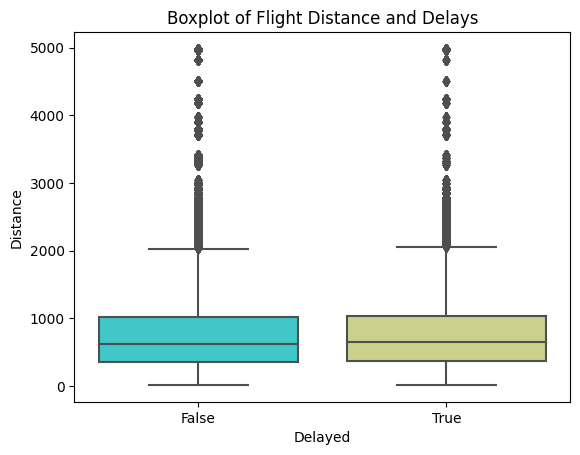

In [81]:
# create a boxplot of relationship between arrival delay rates and distance
sns.boxplot(x="Delayed", y="Distance", data=flights_del,
            palette='rainbow').set(title='Boxplot of Flight Distance and Delays')